# Here are some examples of lineplot functionality...

In [1]:
import avt

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## Stack Plot:

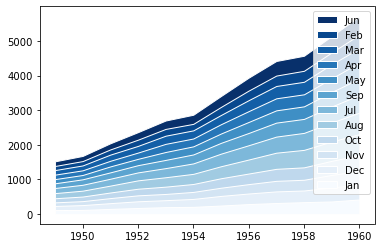

In [3]:
ax = avt.stackplot(flights, x='year', y='passengers', hue='month', cmap='Blues')

# saving graph
ax.figure.savefig('./figures/stackplot.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/stackplot.png', bbox_inches='tight', dpi=300)

## Parallel Plot:

In [4]:
# create some dummy data
ynames = ['P1', 'P2', 'P3', 'P4', 'P5']
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
y1 = np.random.uniform(0, 10, N) + 7 * category
y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
y3 = np.random.binomial(300, 1 - category / 10, N)
y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
y5 = np.random.uniform(0, 800, N)

# organize the data
ys = np.dstack([y1, y2, y3, y4, y5])[0]


data = pd.DataFrame(
    ys,
    columns=ynames,
).assign(groups=category, units=np.arange(23)).melt(id_vars=['groups', 'units'])
data.head()

,groups,units,variable,value
0,1,0,P1,12.183908
1,1,1,P1,13.933378
2,1,2,P1,10.631005
3,1,3,P1,11.384617
4,1,4,P1,16.828733


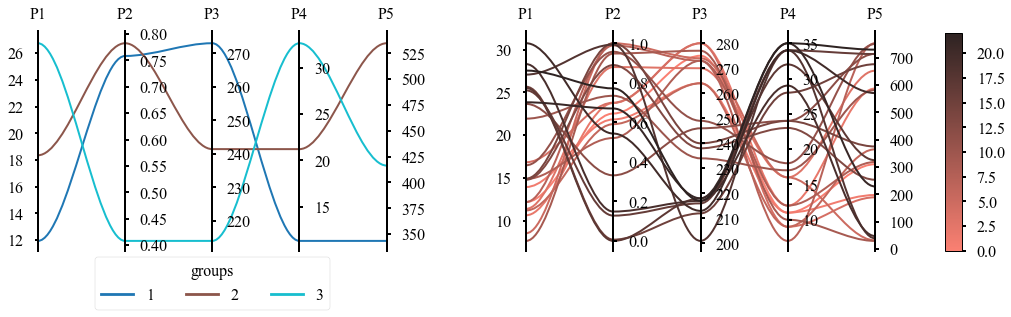

In [5]:
with avt.paper_theme():

    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    axes[0] = avt.parallelplot(
        data=data,
        x='variable',
        y='value',
        hue='groups',
        legend=True,
        bezier=True,
        cmap='tab10',
        linewidth=2,
        ax=axes[0],
    )
    sns.move_legend(axes[0], 'center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    
    axes[1] = avt.parallelplot(
        data=data,
        x='variable',
        y='value',
        hue='units',
        legend=False,
        bezier=True,
        cmap=sns.color_palette('dark:salmon_r', as_cmap=True),
        linewidth=2,
        ax=axes[1],
        cbar=True,
        cbar_x=1.2
    )
    #sns.move_legend(axes[1], 'center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    fig.subplots_adjust(wspace=0.4)


# saving graph
ax.figure.savefig('./figures/parallelplot.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/parallelplot.png', bbox_inches='tight', dpi=300)